In [318]:
import pandas as pd
import numpy as np 
import glob
import os
import re
import matplotlib.pyplot as plt

In [319]:
data = glob.glob('*csv')

dfs = []
for file in data:
    dfs.append(pd.read_csv(file))

In [320]:
us_census = pd.concat(dfs , ignore_index = True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [321]:
print(us_census.dtypes)
print(us_census.columns)

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [322]:
del us_census['Unnamed: 0']

In [323]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [324]:
us_census.columns = us_census.columns.str.lower()

In [325]:
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [326]:
pattern = re.compile(r'[^\d\.]')
us_census["income"] = [pattern.sub("",x) for x in us_census["income"]]
us_census["income"] = us_census["income"].astype(float)

In [327]:
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [328]:
us_census[['men','women']] = us_census.genderpop.str.split("_", expand=True)

In [329]:
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop,men,women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F


In [330]:
pattern2 = re.compile(r'[^\d\.]')
us_census["men"] = [pattern2.sub("",x) for x in us_census["men"]]

pattern3 = re.compile(r'[^\d\.]')
us_census["women"] = [pattern3.sub("",x) for x in us_census["women"]]

In [331]:
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop,men,women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329


In [332]:
us_census.dtypes

state         object
totalpop       int64
hispanic      object
white         object
black         object
native        object
asian         object
pacific       object
income       float64
genderpop     object
men           object
women         object
dtype: object

In [333]:
us_census.loc[:,['state', 'women']]

,state,women
0,Alabama,2489527
1,Alaska,349215
2,Arizona,3342840
3,Arkansas,1506295
4,California,19334329
5,Colorado,2630239
6,Colorado,2630239
7,Connecticut,1841615
8,Delaware,478041
9,District of Columbia,340810


In [334]:
us_census.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool

In [335]:
us_census = us_census.drop_duplicates(ignore_index = True)

In [336]:
print(us_census.isnull().sum())

state        0
totalpop     0
hispanic     0
white        0
black        0
native       0
asian        0
pacific      4
income       0
genderpop    0
men          0
women        0
dtype: int64


In [337]:
us_census['men'] = us_census['men'].astype('int64')

In [338]:
filler = us_census['totalpop'] - us_census['men']
us_census['women'] = us_census['women'].replace(to_replace = "", value = np.nan)

In [339]:
us_census['women'].fillna(filler, inplace=True)

In [340]:
us_census

,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop,men,women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239
6,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615
7,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041
8,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810
9,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F,9600009,10045763


In [341]:
us_census['women'] = us_census['women'].astype('int64')

In [342]:
us_census.dtypes

state         object
totalpop       int64
hispanic      object
white         object
black         object
native        object
asian         object
pacific       object
income       float64
genderpop     object
men            int64
women          int64
dtype: object

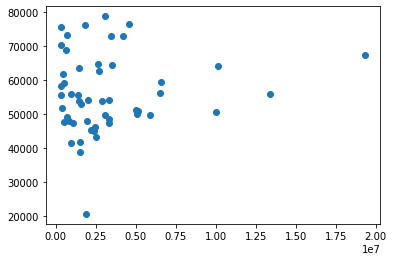

In [343]:
plt.scatter(us_census['women'], us_census['income'])
plt.show()

In [344]:
us_census.columns

Index(['state', 'totalpop', 'hispanic', 'white', 'black', 'native', 'asian',
       'pacific', 'income', 'genderpop', 'men', 'women'],
      dtype='object')

In [345]:
us_census.head()

,state,totalpop,hispanic,white,black,native,asian,pacific,income,genderpop,men,women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329


In [346]:
us_census["hispanic"] = [pattern.sub("",x) for x in us_census["hispanic"]]
us_census["white"] = [pattern.sub("",x) for x in us_census["white"]]
us_census["black"] = [pattern.sub("",x) for x in us_census["black"]]
us_census["native"] = [pattern.sub("",x) for x in us_census["native"]]
us_census["asian"] = [pattern.sub("",x) for x in us_census["asian"]]

In [347]:
us_census['hispanic'] = us_census['hispanic'].astype('float64')
us_census['white'] = us_census['white'].astype('float64')
us_census['black'] = us_census['black'].astype('float64')
us_census['native'] = us_census['native'].astype('float64')
us_census['asian'] = us_census['asian'].astype('float64')

In [348]:
pattern4=re.compile(r"[/%]")
us_census["pacific"] = us_census["pacific"].str.replace(pattern4,"").astype(float)

In [351]:
us_census.dtypes

state         object
totalpop       int64
hispanic     float64
white        float64
black        float64
native       float64
asian        float64
pacific      float64
income       float64
genderpop     object
men            int64
women          int64
dtype: object

In [352]:
filler2 = us_census['pacific'].mean()
us_census['pacific'] = us_census['pacific'].fillna(filler2)

In [354]:
us_census.isnull().sum()

state        0
totalpop     0
hispanic     0
white        0
black        0
native       0
asian        0
pacific      0
income       0
genderpop    0
men          0
women        0
dtype: int64

In [358]:
us_census.duplicated().sum()

0

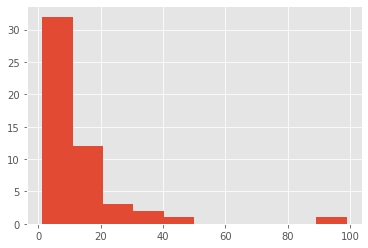

In [359]:
plt.style.use('ggplot')
plt.hist(us_census["hispanic"])
plt.show()

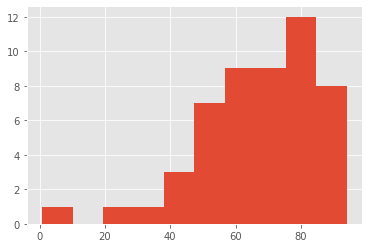

In [360]:
plt.style.use('ggplot')
plt.hist(us_census["white"])
plt.show()

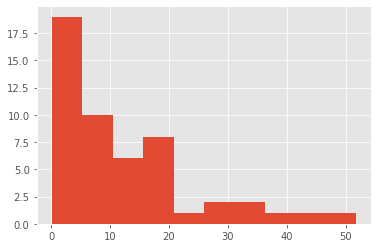

In [361]:
plt.style.use('ggplot')
plt.hist(us_census["black"])
plt.show()

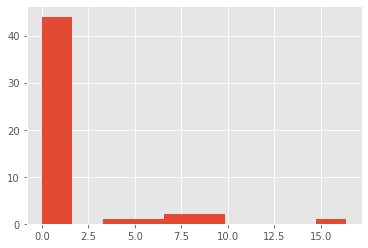

In [362]:
plt.style.use('ggplot')
plt.hist(us_census["native"])
plt.show()

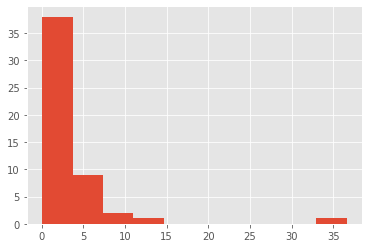

In [363]:
plt.style.use('ggplot')
plt.hist(us_census["asian"])
plt.show()

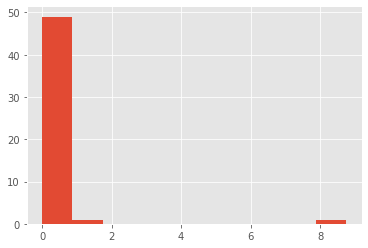

In [364]:
plt.style.use('ggplot')
plt.hist(us_census["pacific"])
plt.show()